In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [257]:
path_to_src_file = "Japan_Stats.csv"
path_to_pred_file = "Japan_Predicts.csv"
path_to_save_file = "Japan_Simulation.csv"

source_df = pd.read_csv(path_to_src_file, delimiter=';', engine='python', decimal=',')
pred_df = pd.read_csv(path_to_pred_file, delimiter=';', engine='python', decimal=',')
source_df

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75,m,Japan,392,2000,3109.086,3072.165,3352.356,3838.717,4402.024,...,4289.864,3725.427,3346.898,2651.686,1591.350,899.134,465.646,143.999,24.215,1.906
1,75,m,Japan,392,2005,3014.676,3109.536,3072.970,3362.557,3854.557,...,5090.844,4111.559,3480.254,2998.307,2217.312,1174.393,537.649,201.768,38.910,3.305
2,75,f,Japan,392,2000,2946.140,2926.033,3191.969,3664.207,4194.774,...,4436.395,3964.122,3738.831,3218.796,2503.390,1695.010,1052.058,419.748,98.290,11.507
3,75,f,Japan,392,2005,2856.789,2947.679,2927.847,3205.908,3687.760,...,5177.935,4358.758,3853.669,3567.748,2963.578,2144.011,1267.175,620.722,174.664,24.518


In [258]:
men = {}
men[2000] = source_df.iloc[0]
men[2005] = source_df.iloc[1]

women = {}
women[2000] = source_df.iloc[2]
women[2005] = source_df.iloc[3]

ages  =  ["%d - %d" % (i, i+4) for i in range(0, 99, 5)]
ages.append("100+")
print(ages)

['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']


In [277]:

def get_possible_mothers(year):
    return reduce(lambda x, y: x+y, women[year].loc[ages[4:8]])

In [275]:
# Calculate parameters

_men_surv = {}

for it in range(0, len(ages) - 2):
    surv_coef = men[2005].loc[ages[it + 1]]/men[2000].loc[ages[it]]
    # What if surv rate is upper than 1?
    _men_surv[ages[it]] = surv_coef
# 100+ groups is formed from 95-99 and 100+ prev groups
_men_surv[ages[it+1]] = men[2005].loc[ages[it + 1]]/(men[2000].loc[ages[it]] + men[2000].loc[ages[it + 1]])
print("_men_surv: ", _men_surv)

_women_surv = {}

for it in range(0, len(ages) - 2):
    surv_coef = women[2005].loc[ages[it + 1]]/women[2000].loc[ages[it]]
    # What if surv rate is upper than 1?
    _women_surv[ages[it]] = surv_coef
# 100+ groups is formed from 95-99 and 100+ prev groups
_women_surv[ages[it+1]] = women[2005].loc[ages[it + 1]]/(women[2000].loc[ages[it]] + women[2000].loc[ages[it + 1]])
print("_women_surv", _women_surv)

children_born = men[2005].loc[ages[0]] + women[2005].loc[ages[0]]
possible_mothers = get_possible_mothers(2000)
_fert_rate = children_born / possible_mothers
print("fert_rate: %f" %(_fert_rate))

_girls_boys_rate = women[2005].loc[ages[0]] / men[2005].loc[ages[0]]
print("girls_boys_rate: %f" %(_girls_boys_rate))

_men_surv:  {'0 - 4': 1.0001447370706376, '5 - 9': 1.0002620301969458, '10 - 14': 1.0030429345809333, '15 - 19': 1.0041263786832944, '20 - 24': 1.0025538252403892, '25 - 29': 1.000200486868407, '30 - 34': 0.998260796991125, '35 - 39': 0.9954755503031388, '40 - 44': 0.990976823910233, '45 - 49': 0.9835021406847871, '50 - 54': 0.9729925608033866, '55 - 59': 0.9584357452823681, '60 - 64': 0.9341892889056744, '65 - 69': 0.8958465420816528, '70 - 74': 0.8361895035837575, '75 - 79': 0.7379853583435448, '80 - 84': 0.597963151209942, '85 - 89': 0.43330770585380307, '90 - 94': 0.27021020979312355, '95 - 99': 0.23131249479829263}
_women_surv {'0 - 4': 1.0005223784341546, '5 - 9': 1.0006199519964403, '10 - 14': 1.0043668970469324, '15 - 19': 1.0064278573781449, '20 - 24': 1.0046767716210694, '25 - 29': 1.0021219419720615, '30 - 34': 1.0005435036472499, '35 - 39': 0.9986008034417844, '40 - 44': 0.9961228396489926, '45 - 49': 0.9924544445337258, '50 - 54': 0.9881091460210075, '55 - 59': 0.982499980

In [261]:
# Do simulation

PREDICT_DISTANCE = 95

fin_df = pd.DataFrame()

for cur_year in range(2010, 2010 + PREDICT_DISTANCE, 5):

    prev_year = cur_year - 5

    men[cur_year] = source_df.iloc[0].copy() # Make DF row with placeholder data
    men[cur_year].loc["Year"] = cur_year
    women[cur_year] = source_df.iloc[2].copy() # Make DF row with placeholder data
    women[cur_year].loc["Year"] = cur_year

    for it, age in enumerate(ages):
        if age == "0 - 4":
            possible_mothers = get_possible_mothers(prev_year)
            new_children = possible_mothers * _fert_rate
            men[cur_year].loc[age] = new_children / _girls_boys_rate * 0.5
            women[cur_year].loc[age] = new_children * _girls_boys_rate * 0.5
        else:
            men[cur_year].loc[age] = men[prev_year].loc[ages[it-1]] * _men_surv[ages[it-1]]
            women[cur_year].loc[age] = women[prev_year].loc[ages[it-1]] * _women_surv[ages[it-1]]

    fin_df = fin_df.append(men[cur_year], ignore_index=True)
    fin_df = fin_df.append(women[cur_year], ignore_index=True)

In [262]:
fin_df.loc[fin_df['Sex'] == "m"]

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75.0,m,Japan,392.0,2010.0,3045.776299,3015.112335,3110.350792,3082.320847,3376.432184,...,4290.548862,4879.246863,3840.974379,3117.773511,2507.152842,1636.343791,702.243739,232.967455,54.519774,9.000369
2,75.0,m,Japan,392.0,2015.0,2851.483122,3046.217136,3015.902386,3119.815386,3095.039670,...,3725.571329,4112.215396,4558.140158,3440.923615,2607.049485,1850.242088,978.473290,304.287624,62.950185,12.611105
4,75.0,m,Japan,392.0,2020.0,2513.754913,2851.895837,3047.015337,3025.079580,3132.688926,...,3878.965453,3570.720733,3841.587577,4083.394098,2877.264210,1923.964348,1106.376590,423.980016,82.221623,14.561164
6,75.0,m,Japan,392.0,2025.0,2296.602146,2514.118746,2852.643120,3056.287205,3037.562203,...,4200.359158,3717.739145,3335.729062,3441.472947,3414.491284,2123.378859,1150.459785,479.401502,114.563729,19.018889
8,75.0,m,Japan,392.0,2030.0,2154.046718,2296.934549,2514.777521,2861.323526,3068.898603,...,4762.483848,4025.774360,3473.072088,2988.301346,2877.723555,2519.844574,1269.702314,498.503090,129.539180,26.500022
10,75.0,m,Japan,392.0,2035.0,2072.108791,2154.358489,2297.536415,2522.429825,2873.130431,...,4159.777553,4564.534756,3760.835287,3111.339621,2498.786219,2123.717849,1506.774202,550.171797,134.700625,29.964031
12,75.0,m,Japan,392.0,2040.0,2006.459684,2072.408702,2154.922996,2304.527668,2532.838326,...,3642.438043,3986.879499,4264.139478,3369.131287,2601.669533,1844.067643,1269.905017,652.896873,148.662037,31.157938
14,75.0,m,Japan,392.0,2045.0,1882.124400,2006.750094,2072.951735,2161.480285,2314.037022,...,3190.624769,3491.042821,3724.500124,3820.014607,2817.232218,1919.994023,1102.684499,550.259630,176.419401,34.387387
16,75.0,m,Japan,392.0,2050.0,1738.565490,1882.396813,2007.275923,2079.259592,2170.399371,...,2924.717481,3058.008828,3261.294810,3336.580557,3194.256117,2079.076128,1148.085676,477.801691,148.685770,40.808012
18,75.0,m,Japan,392.0,2055.0,1593.732233,1738.817125,1882.890058,2013.383932,2087.839404,...,2960.294872,2803.153778,2856.759093,2921.619678,2790.013640,2357.314246,1243.210913,497.474370,129.106895,34.392876


In [263]:
pred_df.loc[pred_df['Sex'] == "m"]

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75,m,Japan,392,2010,2939.908,3015.527,3110.558,3084.030,3380.795,...,4301.780,4896.391,3860.703,3141.269,2534.739,1666.071,724.013,244.055,58.001,5.703
1,75,m,Japan,392,2015,2793.133,2941.092,3016.811,3122.054,3103.833,...,3750.558,4151.059,4618.972,3508.541,2682.333,1936.043,1055.584,342.372,74.019,9.104
2,75,m,Japan,392,2020,2637.259,2794.646,2942.569,3028.732,3142.554,...,3921.382,3629.614,3932.390,4223.661,3023.837,2080.677,1259.400,520.093,109.940,12.664
3,75,m,Japan,392,2025,2556.442,2639.054,2796.307,2954.810,3049.979,...,4263.122,3804.304,3451.305,3616.066,3670.932,2378.963,1386.730,644.690,176.257,19.864
4,75,m,Japan,392,2030,2560.022,2558.434,2640.878,2808.863,2976.669,...,4849.856,4144.936,3629.462,3189.854,3167.112,2925.124,1620.255,734.161,228.923,33.500
5,75,m,Japan,392,2035,2599.454,2562.141,2560.375,2653.707,2831.328,...,4259.798,4724.775,3966.455,3370.115,2813.696,2553.453,2031.805,884.063,271.679,46.957
6,75,m,Japan,392,2040,2626.523,2601.653,2564.145,2573.371,2676.635,...,3753.753,4157.311,4533.119,3698.004,2991.547,2292.919,1806.542,1141.718,341.507,60.021
7,75,m,Japan,392,2045,2596.307,2628.798,2603.700,2577.245,2596.619,...,3312.755,3669.295,3998.292,4241.871,3301.607,2461.822,1649.785,1042.993,458.890,79.337
8,75,m,Japan,392,2050,2503.966,2598.677,2630.886,2616.878,2600.702,...,3056.587,3242.861,3536.569,3753.920,3806.850,2740.861,1797.994,975.416,433.888,110.811


In [264]:
def get_data_from_df(dataframe, sex = "m", year = 2050):
    try:
        return dataframe.loc[(dataframe['Sex'] == sex) & (dataframe['Year'] == year)][ages].values.flatten().tolist()
    except:
        return None

In [265]:
def plot_analytics(sex = "m", year = 2050):
    
    plt.figure(figsize=(23,13))

    try:
        plt.plot(ages, get_data_from_df(fin_df, sex, year), c = "r", label = "My model prediction for %s in %d" % (sex, year))
        plt.plot(ages, get_data_from_df(pred_df, sex, year), c = "b", label = "Prediction from Dataset for %s in %d" % (sex, year))
    except:
        None
    plt.legend(fontsize = 14)
    plt.xlabel("Year groups", fontsize = 14)
    plt.ylabel("People quantity", fontsize = 14)
    plt.title("Population Dynamics", fontsize = 16)
    plt.grid(True)


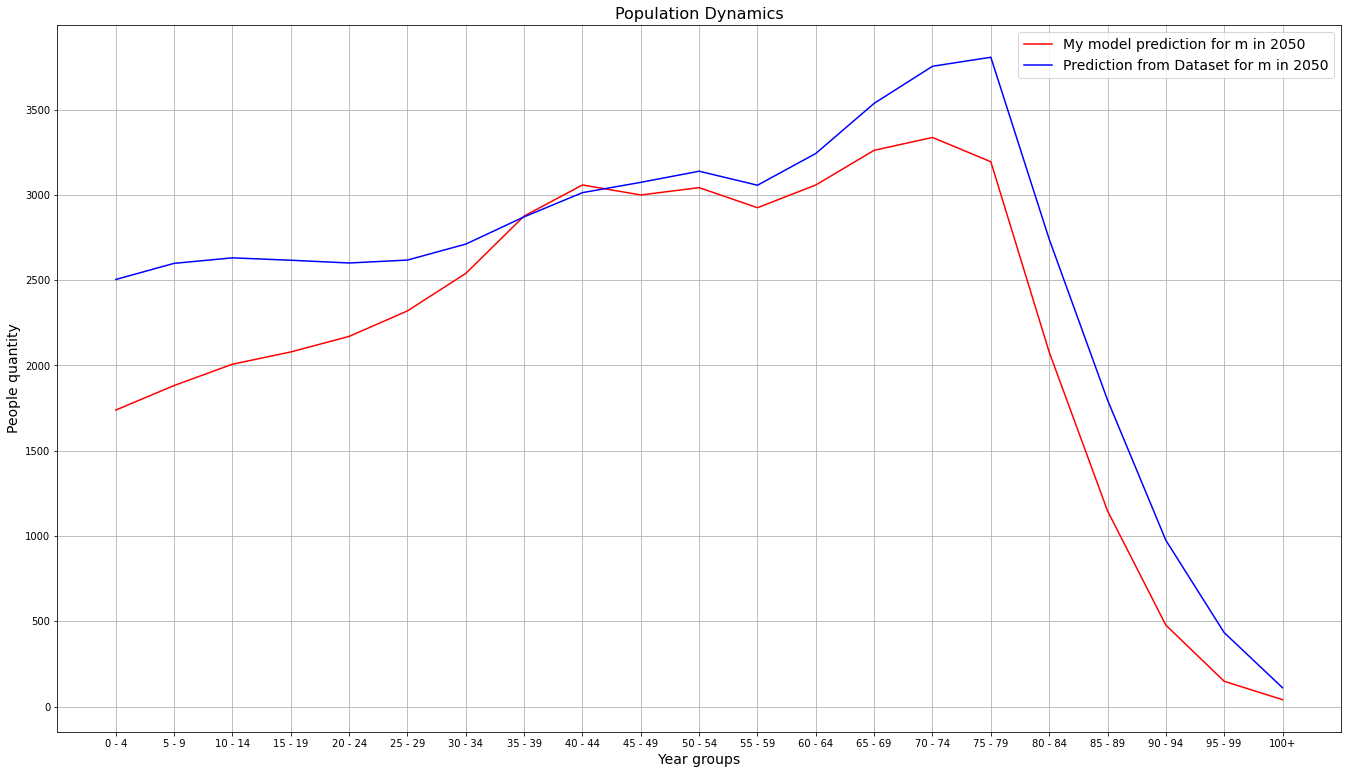

In [266]:
plot_analytics(sex = "m", year = 2050)

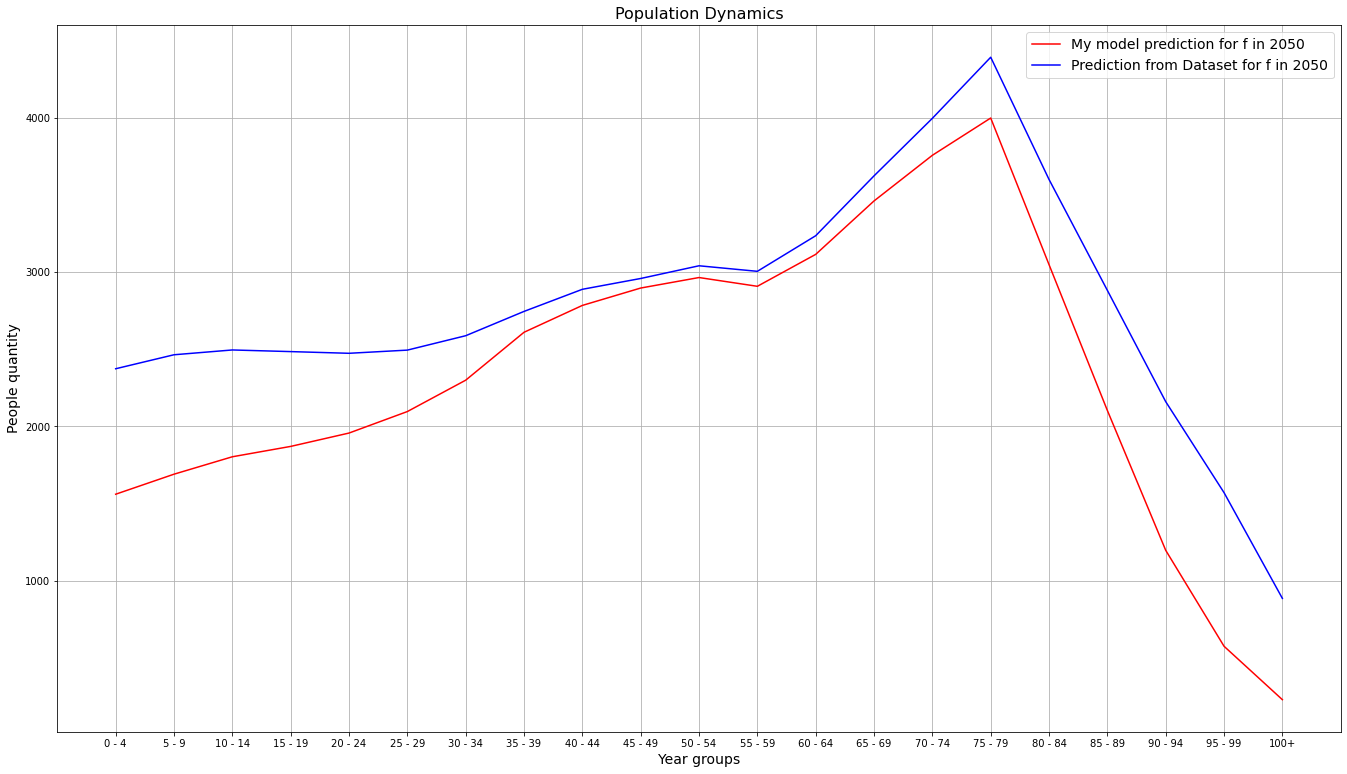

In [267]:
plot_analytics(sex = "f", year = 2050)

In [278]:
fin_df.to_csv(path_to_save_file, sep = ';', decimal = ',')